# Analyse du commerce mondial 1945-2014

Version du 22 mai 2022 


Source: CEPII - TRADHIST 

"the dataset we gather is unique in its temporal as well as geographical coverage: we gather more than 1.9 million bilateral trade observations for the 188 years from 1827 to 2014."


* [Site web: TRADHIST](http://www.cepii.fr/CEPII/en/bdd_modele/bdd_modele_item.asp?id=32)
* Fouquin, M. et Hugot, J. (2016) Two Centuries of Bilateral Trade and Gravity Data: 1827-2014. CEPII Working Paper, N°2016-14. 
* Licence : Etalab 2.0



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
### Installer préalablement Basemap dans l'environnement activé : 
# mamba install basemap
## https://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html#.Yoq1zNvRZQI
## https://tuangauss.github.io/projects/networkx_basemap/networkx_basemap.html
from mpl_toolkits.basemap import Basemap

In [3]:
# https://networkx.org/documentation/stable/install.html
import networkx as nx

#### https://ipycytoscape.readthedocs.io/en/latest/installing.html
# import ipycytoscape as cy

In [4]:
from shutil import copyfile

## Définitions

Le point de départ sont toutes les relations commerciales annuelles entre pays, de 1945 à 2014, dont la valeur annuelle est égale ou supérieure à 100 millions GBP 

# Commerce mondial

In [5]:
### Adresse du fichier
file_addr = 'data/fb_bitrade_with_value_and_total_1945sqq_100_million_min.csv'

In [6]:
### Créer un dataframe
trade = pd.read_csv(file_addr, sep='\t')

In [7]:
### Propriétés du dataframe
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68530 entries, 0 to 68529
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   t_source     68530 non-null  object 
 1   t_target     68530 non-null  object 
 2   t_year       68530 non-null  int64  
 3   t_total      68530 non-null  float64
 4   t1_flow      68522 non-null  float64
 5   t_flow_back  68528 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
### Premières lignes
trade.head()

t_source t_target  t_year      t_total      t1_flow  t_flow_back
0      ABW      BRA    2006  120453784.0  109458824.0   10994960.0
1      ABW      BRA    2007  159933442.0  149810160.0   10123282.0
2      ABW      BRA    2008  213877165.0  201697168.0   12179997.0
3      ABW      BRA    2009  126310532.0  115163480.0   11147052.0
4      ABW      BRA    2011  136125771.0  126267464.0    9858307.0

In [9]:
### Distribution dans le temps
trade.t_year.describe()

count    68530.000000
mean      1997.941456
std         12.952731
min       1945.000000
25%       1990.000000
50%       2001.000000
75%       2009.000000
max       2014.000000
Name: t_year, dtype: float64

(1945.0, 2014.0)

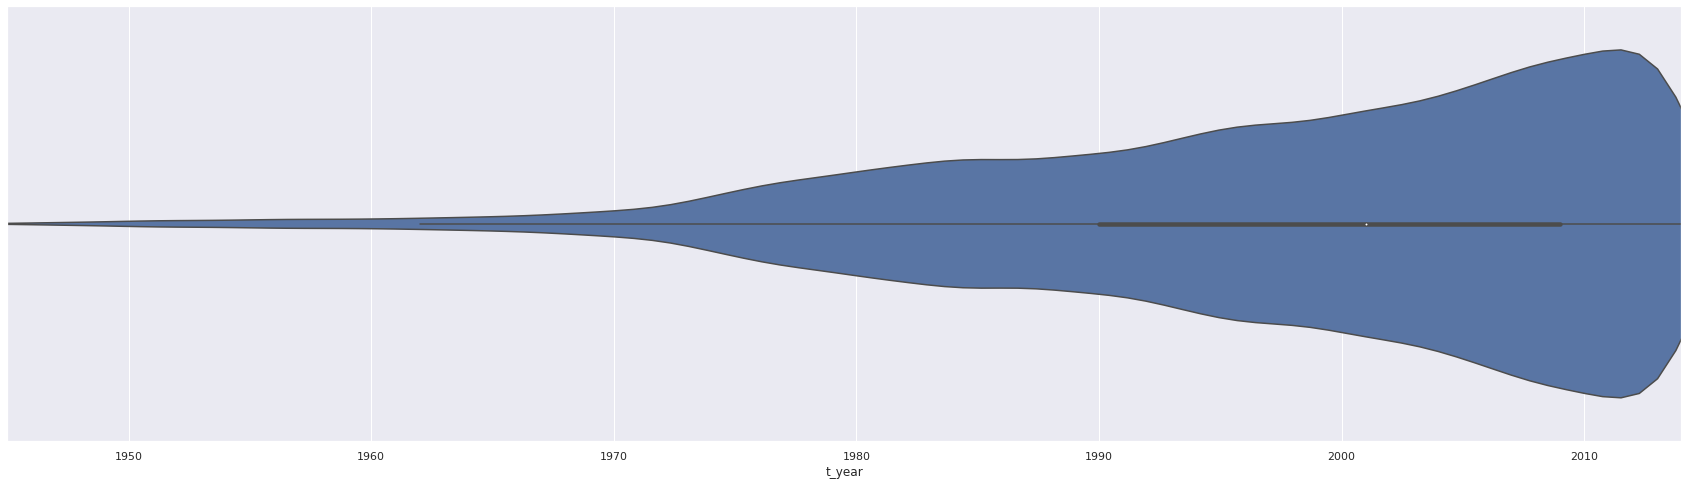

In [10]:
### Représenter la densité de la distribution dans le temps
## des effectifs des pays dont le commerce total dépasse les 100 millions
# Noter que sont affichées ici presque 70000 lignes


sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = trade.t_year

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))

In [11]:
### Distribution des valeurs des échanges
## Noter la valeur maximale de 380 milliards : 380 000 000 000  = 3.8e+11
trade.t_total.describe()

count    6.853000e+04
mean     2.254524e+09
std      1.009305e+10
min      1.000019e+08
25%      1.805286e+08
50%      3.814915e+08
75%      1.183421e+09
max      3.820785e+11
Name: t_total, dtype: float64

[]

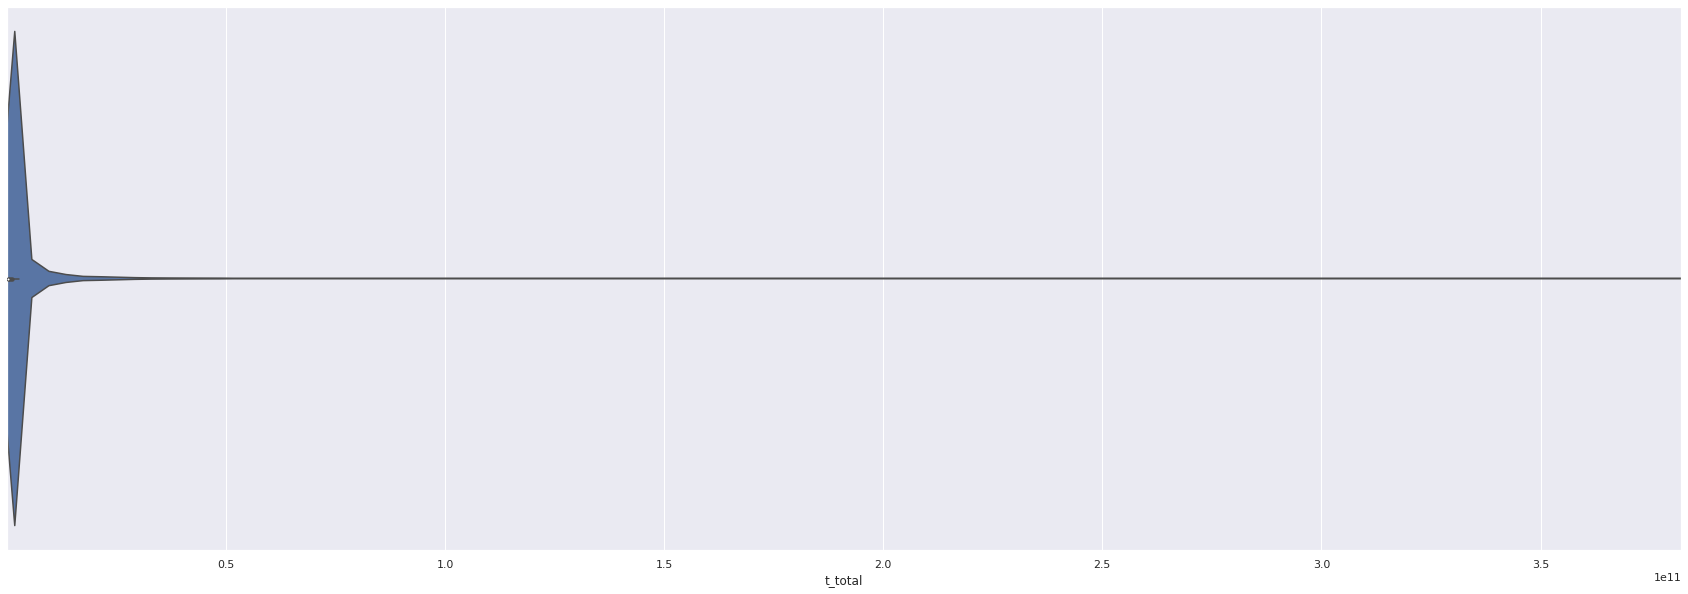

In [12]:
### Représenter la densité de la distribution des valeurs totales des échanges


sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 10)})

a = trade.t_total

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))
ax.plot()

34265
100001892.0 381486456.0


[]

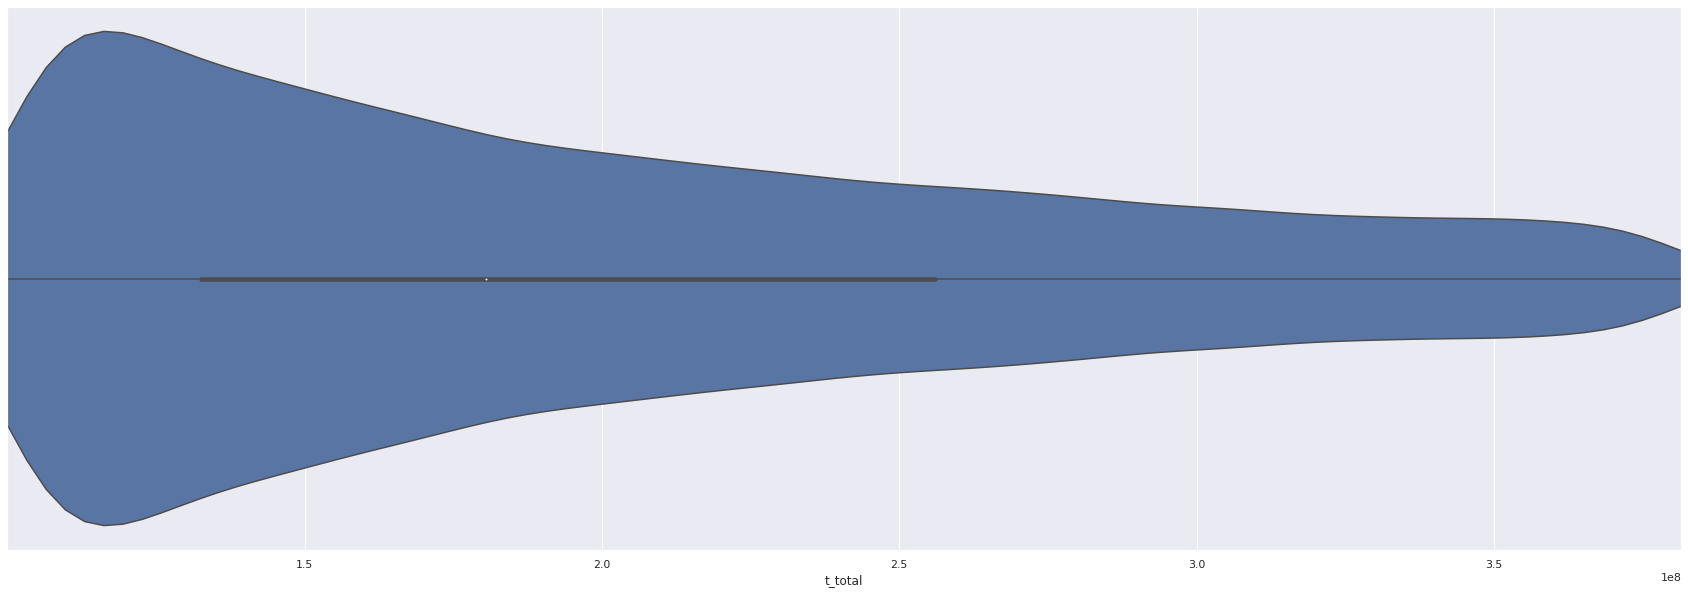

In [13]:
### Représenter la densité de la distribution dans le temps
# Noter que sont affichées ici presque un million de lignes


sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 10)})

### inférieur à la médiane
tt = trade[trade.t_total < 381490000]
print(len(tt))
a=tt.t_total

print(min(a), max(a))
ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))
ax.plot()

17132
381496608.0 1183318296.0


[]

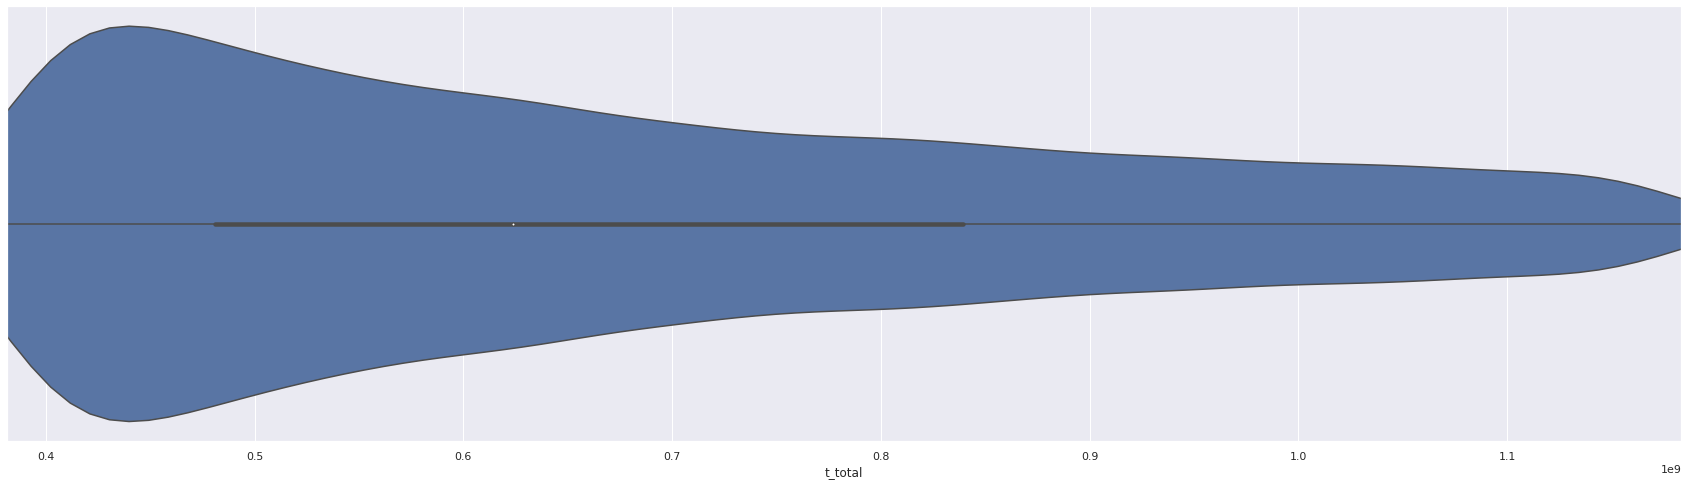

In [14]:
### Représenter la densité de la distribution dans le temps
# Noter que sont affichées ici presque un million de lignes


sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

### suépérieur à la médiane, inférieur au 3e quartile = étendue du 3e quartile
tt = trade[(trade.t_total >= 381490000) & (trade.t_total < 1183421000)]
print(len(tt))
a=tt.t_total

print(min(a), max(a))
ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))
ax.plot()

## Les pays concernés

In [15]:
pays = set(list(trade.t_source) + list(trade.t_target))
len(pays)

201

In [16]:
len(set(trade.t_year))

70

In [17]:
### Chercher tous les pays concernés par les pays retenus même si valeur commerce inférieure
# tt_t = active_trade[(active_trade['t_source'].isin(pays)) & (active_trade.t_target.isin(pays))].copy(deep=True)

In [106]:
### Années de présence exportatrice
print(trade.t_source.value_counts().head())

FRA    2860
GBR    2840
BEL    2668
CHN    2613
CAN    2112
Name: t_source, dtype: int64


In [105]:
### Années de présence importatrice
print(trade.t_target.value_counts().head())

USA    5077
NLD    2241
SWE    1910
JPN    1866
ITA    1831
Name: t_target, dtype: int64


# Totaux commerce international par année

In [20]:
tot_trade = trade.groupby('t_year').t_total.sum()
tot_trade.describe()

count    7.000000e+01
mean     2.207179e+12
std      3.112672e+12
min      2.259758e+09
25%      2.839278e+10
50%      7.497134e+11
75%      3.236147e+12
max      1.114352e+13
Name: t_total, dtype: float64

In [ ]:
tot_trade.plot(figsize=(20,7))

In [107]:
### Suisse
tot_CHE = trade[(trade.t_source == 'CHE') | (trade.t_target == 'CHE')].groupby('t_year').t_total.sum()
tot_CHE.head()

t_year
1951    238571528.0
1952    243714388.0
1953    248178684.0
1954    275321552.0
1955    426857328.0
Name: t_total, dtype: float64

In [23]:
### France
tot_FRA = trade[(trade.t_source == 'FRA') | (trade.t_target == 'FRA')].groupby('t_year').t_total.sum()

In [24]:
### Allemagne fédérale et allemagne
tot_DEU = trade[(trade.t_source == 'DEU') | (trade.t_target == 'DEU')\
                | (trade.t_source == 'WDEU') | (trade.t_target == 'WDEU')].groupby('t_year').t_total.sum()

In [25]:
### États Unis 
tot_USA = trade[(trade.t_source == 'USA') | (trade.t_target == 'USA')].groupby('t_year').t_total.sum()

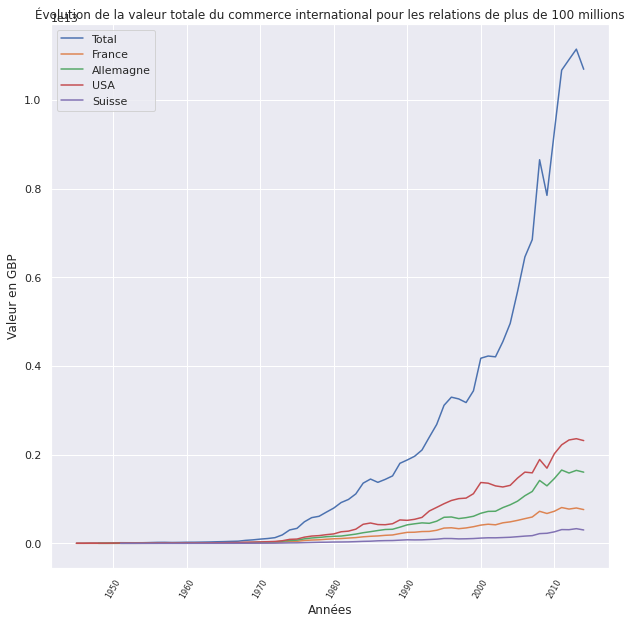

In [177]:
fig = plt.figure(figsize=(10,10))
tot_trade.plot(label="Total")
tot_FRA.plot(label="France")
tot_DEU.plot(label="Allemagne")
tot_USA.plot(label="USA")
tot_CHE.plot(label="Suisse")

plt.xticks(rotation=60, size= 8)
plt.xlabel('Années')
plt.ylabel('Valeur en GBP')
plt.title('Évolution de la valeur totale du commerce international pour les relations de plus de 100 millions')
plt.legend()
plt.show()

### Balance commerciale

In [27]:
trade.head()

t_source t_target  t_year      t_total      t1_flow  t_flow_back
0      ABW      BRA    2006  120453784.0  109458824.0   10994960.0
1      ABW      BRA    2007  159933442.0  149810160.0   10123282.0
2      ABW      BRA    2008  213877165.0  201697168.0   12179997.0
3      ABW      BRA    2009  126310532.0  115163480.0   11147052.0
4      ABW      BRA    2011  136125771.0  126267464.0    9858307.0

In [28]:
trade['diff_source'] = trade.t1_flow - trade.t_flow_back
trade['diff_target'] = trade.t_flow_back - trade.t1_flow
trade.head()

t_source t_target  t_year      t_total      t1_flow  t_flow_back  \
0      ABW      BRA    2006  120453784.0  109458824.0   10994960.0   
1      ABW      BRA    2007  159933442.0  149810160.0   10123282.0   
2      ABW      BRA    2008  213877165.0  201697168.0   12179997.0   
3      ABW      BRA    2009  126310532.0  115163480.0   11147052.0   
4      ABW      BRA    2011  136125771.0  126267464.0    9858307.0   

   diff_source  diff_target  
0   98463864.0  -98463864.0  
1  139686878.0 -139686878.0  
2  189517171.0 -189517171.0  
3  104016428.0 -104016428.0  
4  116409157.0 -116409157.0

In [29]:
### États Unis 
balan_USA = trade[(trade.t_source == 'USA')].groupby('t_year').diff_source.sum() \
                   + trade[(trade.t_target == 'USA')].groupby('t_year').diff_target.sum()
balan_USA

t_year
1945             NaN
1946             NaN
1947    1.827868e+09
1948    1.111595e+09
1949    1.021012e+09
            ...     
2010   -4.781155e+11
2011   -4.811386e+11
2012   -4.997454e+11
2013   -4.908107e+11
2014   -4.847037e+11
Length: 70, dtype: float64

In [ ]:
### Suisse
trade[(trade.t_source == 'CHE') & (trade.t_target == 'USA') | (trade.t_source == 'CHE') & (trade.t_target == 'CHE')]\
      .sort_values(by=['t_source', 't_target'])

In [31]:
### États Unis 
balan_USA_CHE = trade[(trade.t_source == 'CHE') & (trade.t_target == 'USA')].groupby('t_year').diff_target.sum()
balan_USA_CHE.tail()

t_year
2010   -6.573157e+09
2011   -8.914044e+09
2012   -9.364220e+09
2013   -1.043095e+10
2014   -1.103680e+10
Name: diff_target, dtype: float64

In [ ]:
### Allemagne
trade[(trade.t_source == 'USA') & ((trade.t_target == 'DEU') | (trade.t_target == 'WDEU'))]\
      .sort_values(by=['t_source', 't_target']).tail()


In [33]:
### États Unis BRD
balan_USA_DEU_1 = trade[(trade.t_source == 'USA') & (trade.t_target == 'WDEU')]\
      .groupby('t_year').diff_source.sum()
balan_USA_DEU_1.head()

t_year
1950    120357192.0
1951    103571472.0
1952     85000032.0
1953     30714296.0
1954     81071456.0
Name: diff_source, dtype: float64

In [ ]:
### États Unis Allemagne
balan_USA_DEU_2 =  trade[(trade.t_source == 'DEU') & (trade.t_target == 'USA')]\
      .groupby('t_year').diff_target.sum()
balan_USA_DEU_2.head()

In [ ]:
### Somme des précédentes
balan_USA_DEU = pd.concat([balan_USA_DEU_1, balan_USA_DEU_2]).sort_index()
balan_USA_DEU

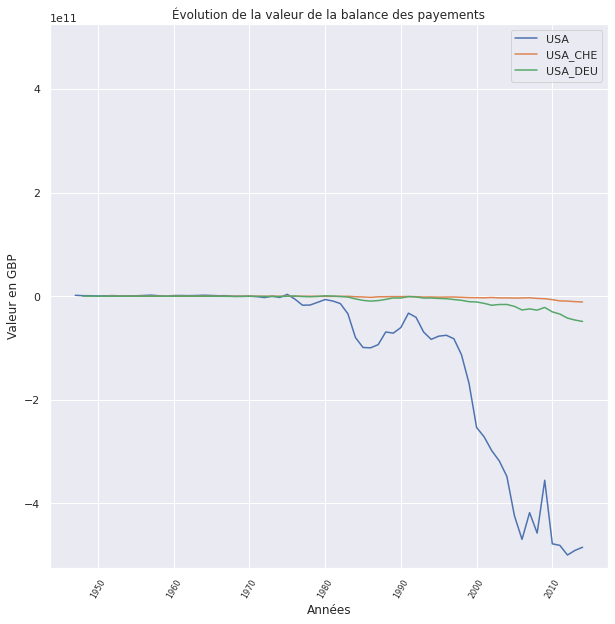

In [36]:
fig = plt.figure(figsize=(10,10))
ax = balan_USA.plot(label="USA")
ax = balan_USA_CHE.plot(label="USA_CHE")
ax = balan_USA_DEU.plot(label="USA_DEU")

yabs_max = abs(max(ax.get_ylim(), key=abs))
ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)

plt.xticks(rotation=60, size= 8)
plt.xlabel('Années')
plt.ylabel('Valeur en GBP')
plt.title('Évolution de la valeur de la balance des payements')
plt.legend()
plt.show()

# Découpage par décennies

In [37]:
ticks = [1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015]

In [ ]:
c_trade = trade.copy(deep=True)
c_trade['decennie_interval'] = pd.cut(trade.t_year, ticks, right=False)
# Inspection
c_trade.head()


In [39]:
c_trade['decennie'] = c_trade['decennie_interval'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_trade.head()

t_source t_target  t_year      t_total      t1_flow  t_flow_back  \
0      ABW      BRA    2006  120453784.0  109458824.0   10994960.0   
1      ABW      BRA    2007  159933442.0  149810160.0   10123282.0   
2      ABW      BRA    2008  213877165.0  201697168.0   12179997.0   
3      ABW      BRA    2009  126310532.0  115163480.0   11147052.0   
4      ABW      BRA    2011  136125771.0  126267464.0    9858307.0   

   diff_source  diff_target decennie_interval   decennie  
0   98463864.0  -98463864.0      [2005, 2015)  2005-2014  
1  139686878.0 -139686878.0      [2005, 2015)  2005-2014  
2  189517171.0 -189517171.0      [2005, 2015)  2005-2014  
3  104016428.0 -104016428.0      [2005, 2015)  2005-2014  
4  116409157.0 -116409157.0      [2005, 2015)  2005-2014

In [40]:
### Vérifier les effectifs du découpage

gb_ct = c_trade.groupby(by='decennie').size()
gb_ct = gb_ct.reset_index()
gb_ct.columns = ['decennie', 'effectif']
gb_ct

decennie  effectif
0  1945-1954       364
1  1955-1964       828
2  1965-1974      2249
3  1975-1984      8245
4  1985-1994     11808
5  1995-2004     17894
6  2005-2014     27142

In [193]:
### https://www.codegrepper.com/code-examples/python/pandas+sum+multiple+columns+groupby

gb_trade_tot = c_trade.groupby(
     ['decennie','t_source', 't_target']
 ).agg(
     sum_t_total = ('t_total','sum'),
     mean_t_total = ('t_total','mean'),
    mean_diff_source = ('diff_source','mean'),
    mean_diff_target = ('diff_target','mean'),
 ).reset_index()

In [194]:
gb_trade_tot = gb_trade_tot[gb_trade_tot.sum_t_total > 0]
gb_trade_tot.sort_values(by=['decennie','t_source', 't_target']).head()

decennie t_source t_target   sum_t_total  mean_t_total  \
904   1945-1954      ANT      USA  1.030286e+08  1.030286e+08   
908   1945-1954      ANT      VEN  1.291266e+09  2.152109e+08   
1118  1945-1954      ARG      BRA  1.045393e+08  1.045393e+08   
1155  1945-1954      ARG      GBR  9.312679e+08  1.330383e+08   
1272  1945-1954      ARG      USA  9.339521e+08  1.556587e+08   

      mean_diff_source  mean_diff_target  
904       3.482858e+07     -3.482858e+07  
908      -2.124005e+08      2.124005e+08  
1118      4.089645e+07     -4.089645e+07  
1155      6.364426e+07     -6.364426e+07  
1272     -3.003771e+07      3.003771e+07

## Préparation

In [43]:
l = []
d = '1945-1954'
for i in gb_trade_tot[gb_trade_tot.decennie == d].values.tolist():
    l.append(tuple((i[1], i[2], {'mean_total': int(i[4]), 'mean_diff_source':int(i[5]), 'mean_diff_target':int(i[6])})))

In [ ]:
l[:5]

In [45]:
G=nx.Graph()

In [46]:
G.add_edges_from(l)

In [47]:
nx.info(G)

'Graph with 45 nodes and 71 edges'

In [48]:
### Principales caractéristiques de ce graphe

# MultiGraph: Undirected graphs with self loops and parallel edges
# https://networkx.org/documentation/stable/reference/classes/index.html

## ,nx.is_connected(G_1971_1975)
G.is_multigraph(), G.is_directed(), G.number_of_nodes(), G.number_of_edges(), nx.density(G)


(False, False, 45, 71, 0.07171717171717172)

In [49]:
list(G.nodes)[:5]

['ANT', 'USA', 'VEN', 'ARG', 'BRA']

# Liste des pays

In [50]:
file_addr = 'data/tradhist_countries_enrichi.csv'

In [51]:
liste_pays = pd.read_csv(file_addr, sep='\t')

In [ ]:
liste_pays.info()

In [53]:
liste_pays.head()

iso                                       label_ext continent  region  \
0  2SICIL  Kingdom of the two Sicilies, Kingdom of Naples     EUROP  STHEUR   
1     ABW                                           Aruba     AMERI   CARIB   
2    ADEN                                            Aden      ASIA  MIDEST   
3     AFG                                     Afghanistan      ASIA  CTRASI   
4     AGO                                          Angola      AFRI  STHAFR   

      long   lat  date_debut  date_fin  
0      NaN   NaN         NaN       NaN  
1 -69.9667  12.5         NaN       NaN  
2      NaN   NaN         NaN       NaN  
3  65.0000  33.0         NaN       NaN  
4  18.5000 -12.5         NaN       NaN

In [202]:
l_pays = dict([(l[0], {'name': l[1], 'continent':l[2], 'region': l[3], 'long': l[4], 'lat':l[5]}) for l in liste_pays.values])
list((k,v) for k,v in l_pays.items())[:2]

[('2SICIL',
  {'name': 'Kingdom of the two Sicilies, Kingdom of Naples',
   'continent': 'EUROP',
   'region': 'STHEUR',
   'long': nan,
   'lat': nan}),
 ('ABW',
  {'name': 'Aruba',
   'continent': 'AMERI',
   'region': 'CARIB',
   'long': -69.9667,
   'lat': 12.5})]

In [55]:
nx.set_node_attributes(G, l_pays)
print(list(G.nodes.data())[:3])

[('ANT', {'name': 'Netherlands Antilles', 'continent': 'AMERI', 'region': 'CARIB', 'long': -68.75, 'lat': 12.25}), ('USA', {'name': 'United States', 'continent': 'AMERI', 'region': 'NORAM', 'long': -97.0, 'lat': 38.0}), ('VEN', {'name': 'Venezuela, Bolivarian Republic of', 'continent': 'AMERI', 'region': 'STHAM', 'long': -66.0, 'lat': 8.0})]


In [56]:
### Y a-t-il des loops ? Un sommet en relation avec lui même ?
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.nodes_with_selfloops.html
list(nx.nodes_with_selfloops(G))

[]

In [57]:
print(list(G.nodes.data('name'))[:3], '\n\n',  [i for i in G.nodes.data('name') if i[0]== 'CHE'] )

[('ANT', 'Netherlands Antilles'), ('USA', 'United States'), ('VEN', 'Venezuela, Bolivarian Republic of')] 

 [('CHE', 'Switzerland')]


## Graphe exemple

In [58]:
edges_weight = [ i[2]['mean_total'] for i in list(G.edges.data())]
edges_weight[:3], sum(edges_weight)

([103028616, 215210918, 155658677], 13805348615)

In [59]:
edges_weight = [i[2]['mean_total'] for i in list(G.edges.data())]
sum_ew = sum(edges_weight)
print(edges_weight[:3], sum_ew)

ew_normalized = [e/sum_ew*100 for e in edges_weight ]
ew_normalized[:3]

[103028616, 215210918, 155658677] 13805348615


[0.7462949243313983, 1.5588952079498066, 1.1275244207224968]

In [ ]:
### Afficher
plt.figure(figsize = (20,10))
pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G_1945_1954)
nx.draw_networkx(G, pos, width=ew_normalized, node_size=600,\
                 node_color='lightblue', font_size=10, font_color='darkblue', edge_color='lightgrey')

ax.plot()

# Liste des BIP

In [61]:
file_addr = 'data/tradhist_pop_gdp_1945sqq.csv'

In [62]:
pop_bip = pd.read_csv(file_addr, sep='\t')

In [63]:
pop_bip.head()

iso  t_year  gdp  population
0  ABW    1960  NaN   54.208000
1  ABW    1961  NaN   55.435001
2  ABW    1962  NaN   56.226002
3  ABW    1963  NaN   56.696999
4  ABW    1964  NaN   57.028999

## Découpage par décennies

In [64]:
ticks = [1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015]

In [65]:
d_pop_bip = pop_bip.copy(deep=True)
d_pop_bip['decennie_interval'] = pd.cut(d_pop_bip.t_year, ticks, right=False)
# Inspection
d_pop_bip.head()


iso  t_year  gdp  population decennie_interval
0  ABW    1960  NaN   54.208000      [1955, 1965)
1  ABW    1961  NaN   55.435001      [1955, 1965)
2  ABW    1962  NaN   56.226002      [1955, 1965)
3  ABW    1963  NaN   56.696999      [1955, 1965)
4  ABW    1964  NaN   57.028999      [1955, 1965)

In [66]:
d_pop_bip['decennie'] = d_pop_bip['decennie_interval'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
d_pop_bip.head()

iso  t_year  gdp  population decennie_interval   decennie
0  ABW    1960  NaN   54.208000      [1955, 1965)  1955-1964
1  ABW    1961  NaN   55.435001      [1955, 1965)  1955-1964
2  ABW    1962  NaN   56.226002      [1955, 1965)  1955-1964
3  ABW    1963  NaN   56.696999      [1955, 1965)  1955-1964
4  ABW    1964  NaN   57.028999      [1955, 1965)  1955-1964

In [67]:
### Vérifier les effectifs du découpage

gb_pb = d_pop_bip.groupby(by='decennie').size()
gb_pb = gb_pb.reset_index()
gb_pb.columns = ['decennie', 'effectif']
gb_pb

decennie  effectif
0  1945-1954      1235
1  1955-1964      1737
2  1965-1974      1900
3  1975-1984      1900
4  1985-1994      1891
5  1995-2004      1870
6  2005-2014      1867

In [68]:
### https://www.codegrepper.com/code-examples/python/pandas+sum+multiple+columns+groupby

gb_pop_bip = d_pop_bip.groupby(
     ['decennie','iso']
 ).agg(
    mean_gdb = ('gdp','mean'),
    mean_population = ('population','mean')
 ).reset_index()

In [69]:
###  Tableau résultat
#  Moyenne GDB et population par pays

gb_pop_bip = gb_pop_bip[gb_pop_bip.mean_gdb > 0]
gb_pop_bip.sort_values(by=['decennie','iso']).head()

decennie  iso      mean_gdb  mean_population
3   1945-1954  ALB  3.390753e+07      1229.956213
5   1945-1954  ARG  2.315573e+09     16938.600781
8   1945-1954  AUS  2.128976e+09      8146.608887
9   1945-1954  AUT  1.099296e+09      6934.001514
11  1945-1954  BEL  2.286922e+09      8597.241309

In [70]:
###  Tableau résultat
#  Moyenne GDB et population par pays

gb_pop_bip = gb_pop_bip[gb_pop_bip.mean_gdb > 0]
gb_pop_bip.sort_values(by=['decennie','iso']).head()

decennie  iso      mean_gdb  mean_population
3   1945-1954  ALB  3.390753e+07      1229.956213
5   1945-1954  ARG  2.315573e+09     16938.600781
8   1945-1954  AUS  2.128976e+09      8146.608887
9   1945-1954  AUT  1.099296e+09      6934.001514
11  1945-1954  BEL  2.286922e+09      8597.241309

In [ ]:
dec = '1945-1954'
gb_pop_bip[gb_pop_bip.decennie == dec]

In [ ]:
dec = '1945-1954'
df_dec = gb_pop_bip[gb_pop_bip.decennie == dec].sort_values('mean_gdb', ascending=False).reset_index()
df_dec

In [ ]:
df_dec['gdp_rank'] = df_dec.apply(lambda x : 1 if x.name < 7 else (2 if x.name < 20 else 3 ), axis = 1)
df_dec.head(25)

In [74]:
l_gdp_rank = dict([(l[2], {'mean_gdb': l[3] if l[3] > 0 else 0, 'gdp_rank':l[5]}) for l in df_dec.values])
list((k,v) for k,v in l_gdp_rank.items())[:3]

[('USA', {'mean_gdb': 95803760230.4, 'gdp_rank': 1}),
 ('USSR', {'mean_gdb': 26721933824.0, 'gdp_rank': 1}),
 ('GBR', {'mean_gdb': 13384799641.6, 'gdp_rank': 1})]

In [ ]:
nx.set_node_attributes(G, l_gdp_rank)
print(list(G.nodes.data())[:3])

In [76]:
res = [] 
for i in list(G.nodes.data()):
    try:
        res.append(i[1]['mean_gdb']) 
    except:
        0
res[:3]
 

[95803760230.4, 1198609301.3333333, 2315573043.2]

In [77]:
### https://stackoverflow.com/questions/58665756/networkx-node-attribute-if-not-exists-create-it
for node in G.nodes:
   node_dict = G.nodes[node]
   if node_dict.get('gdp_rank') is None:
      node_dict['gdp_rank']= 3

In [78]:
print(list(G.nodes.data())[:3])

[('ANT', {'name': 'Netherlands Antilles', 'continent': 'AMERI', 'region': 'CARIB', 'long': -68.75, 'lat': 12.25, 'gdp_rank': 3}), ('USA', {'name': 'United States', 'continent': 'AMERI', 'region': 'NORAM', 'long': -97.0, 'lat': 38.0, 'mean_gdb': 95803760230.4, 'gdp_rank': 1}), ('VEN', {'name': 'Venezuela, Bolivarian Republic of', 'continent': 'AMERI', 'region': 'STHAM', 'long': -66.0, 'lat': 8.0, 'mean_gdb': 1198609301.3333333, 'gdp_rank': 3})]


In [ ]:
sorted(G.nodes(), key=lambda n: G.nodes.data()[n]['gdp_rank'])

In [ ]:
r_1 = [] 
r_2 = [] 
r_3 = [] 
for i in list(G.nodes.data()):
    try:
        if i[1]['gdp_rank'] == 1:
            r_1.append(i[0])
        elif i[1]['gdp_rank'] == 2:
            r_2.append(i[0])
        else:
            r_3.append(i[0])
    except:
        r_3.append(i[1])
ranks = [r_1, r_2, r_3]
ranks
 

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

l = []
for i in gb_trade_tot[gb_trade_tot.decennie == dec].values.tolist():
    l.append(tuple((i[1], i[2], {'mean_total': int(i[4])})))

G=nx.Graph()
G.add_edges_from(l)
print(nx.info(G), ' : ', dec)

### Edges weight
edges_weight = [i[2]['mean_total'] for i in list(G.edges.data())]
sum_ew = sum(edges_weight)
ew_normalized = [e/sum_ew*100 for e in edges_weight ]


### Nodes size
df_dec = gb_pop_bip[gb_pop_bip.decennie == dec].sort_values('mean_gdb', ascending=False).reset_index()
df_dec['gdp_rank'] = df_dec.apply(lambda x : 1 if x.name < 7 else (2 if x.name < 20 else 3 ), axis = 1)
l_gdp_rank = dict([(l[2], {'mean_gdb': l[3], 'gdp_rank':l[5]}) for l in df_dec.values])
nx.set_node_attributes(G, l_gdp_rank)

tot_gdp = df_dec.mean_gdb.sum()
min_gdp = df_dec.mean_gdb.min()

nodes_size = [] 
for i in list(G.nodes.data()):
    try:
        nodes_size.append(i[1]['mean_gdb']/tot_gdp*10000) 
    except:
        nodes_size.append(min_gdp/tot_gdp*10000)


## Ajouter les ranks qui manquent
for node in G.nodes:
   node_dict = G.nodes[node]
   if node_dict.get('gdp_rank') is None:
      node_dict['gdp_rank']= 3

    
r_1 = [] 
r_2 = [] 
r_3 = [] 
for i in list(G.nodes.data()):
    try:
        if i[1]['gdp_rank'] == 1:
            r_1.append(i[0])
        elif i[1]['gdp_rank'] == 2:
            r_2.append(i[0])
        else:
            r_3.append(i[0])
    except:
        r_3.append(i[1])
ranks = [r_1, r_2, r_3]
print(ranks)

#pos = nx.kamada_kawai_layout(G)

pos = nx.shell_layout(G, ranks)

nx.draw_networkx(G, pos, width=ew_normalized, node_size=nodes_size,\
         node_color='lightblue', font_size=10, font_color='darkblue', edge_color='darkgrey')

plt.show()

# Série temporelle de graphes (par décennie)

In [84]:
decennies = list(gb_trade_tot.decennie.unique())
decennies

['1945-1954',
 '1955-1964',
 '1965-1974',
 '1975-1984',
 '1985-1994',
 '1995-2004',
 '2005-2014']

In [86]:
gb_trade_tot.head()

decennie t_source t_target   sum_t_total  mean_t_total  \
904   1945-1954      ANT      USA  1.030286e+08  1.030286e+08   
908   1945-1954      ANT      VEN  1.291266e+09  2.152109e+08   
1118  1945-1954      ARG      BRA  1.045393e+08  1.045393e+08   
1155  1945-1954      ARG      GBR  9.312679e+08  1.330383e+08   
1272  1945-1954      ARG      USA  9.339521e+08  1.556587e+08   

      mean_diff_source  mean_diff_target  
904       3.482858e+07     -3.482858e+07  
908      -2.124005e+08      2.124005e+08  
1118      4.089645e+07     -4.089645e+07  
1155      6.364426e+07     -6.364426e+07  
1272     -3.003771e+07      3.003771e+07

In [260]:
def print_graph(df):
    
    
    for dec in decennies:       

        fig, ax = plt.subplots(figsize=(15,8))

        
        #plt.figure()
        
        l = []
        for i in gb_trade_tot[gb_trade_tot.decennie == dec].values.tolist():
            l.append(tuple((i[1], i[2], {'mean_total': int(i[4])})))

        G=nx.Graph()
        G.add_edges_from(l)
        print(nx.info(G), ' : ', dec)
        
        ### Edges weight
        edges_weight = [i[2]['mean_total'] for i in list(G.edges.data())]
        sum_ew = sum(edges_weight)
        ew_normalized = [e/sum_ew*100 for e in edges_weight ]
        
        ### Nodes size
        df_dec = gb_pop_bip[gb_pop_bip.decennie == dec].sort_values('mean_gdb', ascending=False).reset_index()
        df_dec['gdp_rank'] = df_dec.apply(lambda x : 1 if x.name < 7 else (2 if x.name < 20 else 3 ), axis = 1)
        l_gdp_rank = dict([(l[2], {'mean_gdb': l[3], 'gdp_rank':l[5]}) for l in df_dec.values])
        nx.set_node_attributes(G, l_gdp_rank)

        tot_gdp = df_dec.mean_gdb.sum()
        min_gdp = df_dec.mean_gdb.min()

        nodes_size = [] 
        for i in list(G.nodes.data()):
            try:
                nodes_size.append(i[1]['mean_gdb']/tot_gdp*10000) 
            except:
                nodes_size.append(min_gdp/tot_gdp*10000)

        pos = nx.kamada_kawai_layout(G)
        nx.draw_networkx(G, pos, width=ew_normalized, node_size=nodes_size,\
                 node_color='lightblue', font_size=10, font_color='darkblue', edge_color='darkgrey')

        plt.show()

Graph with 45 nodes and 71 edges  :  1945-1954


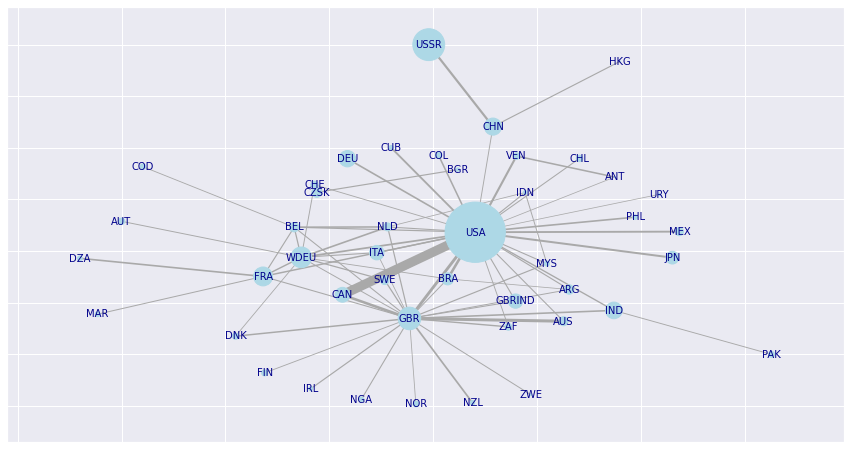

Graph with 58 nodes and 128 edges  :  1955-1964


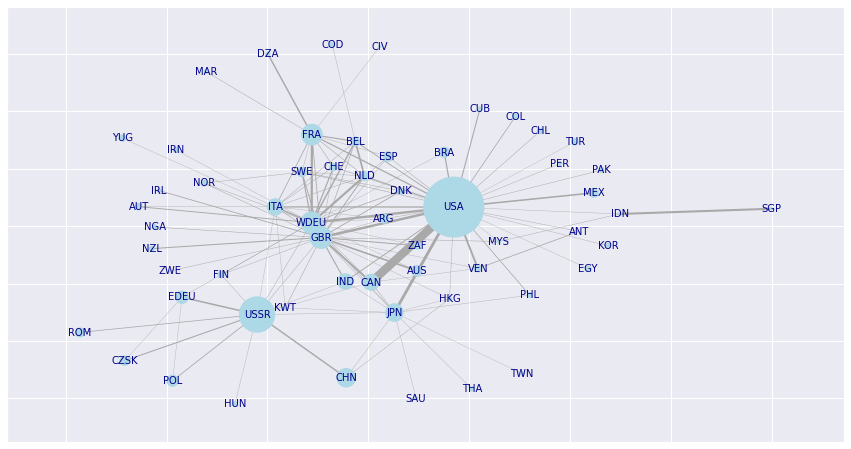

Graph with 98 nodes and 473 edges  :  1965-1974


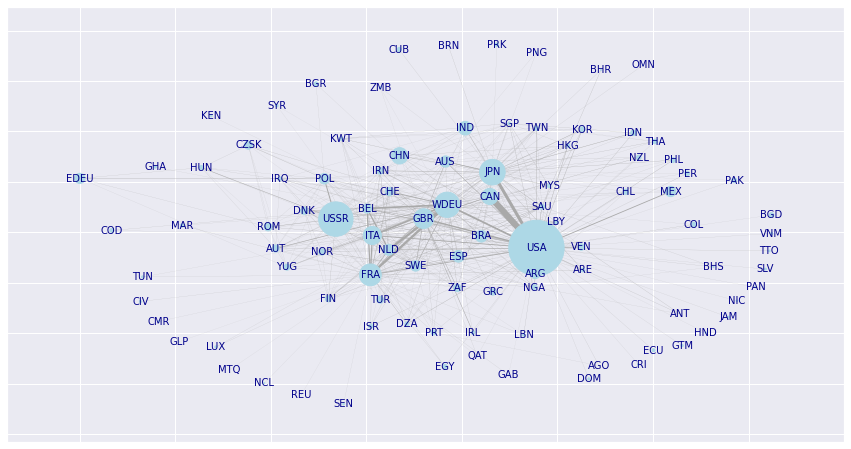

Graph with 137 nodes and 1240 edges  :  1975-1984


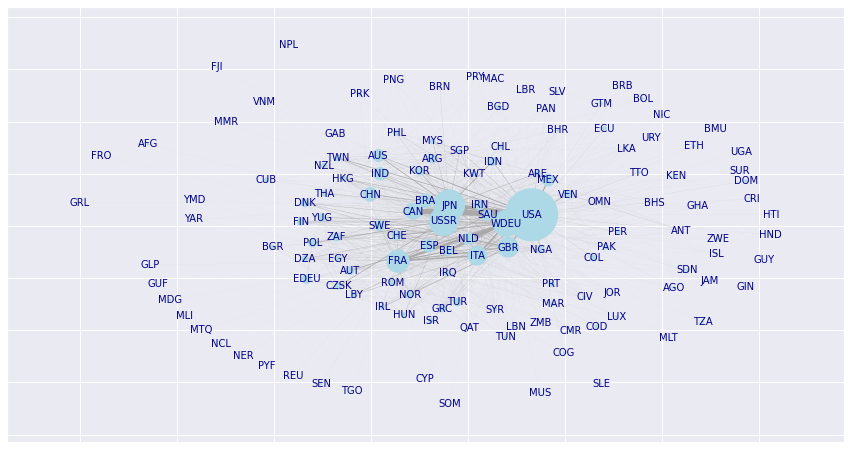

Graph with 175 nodes and 1959 edges  :  1985-1994


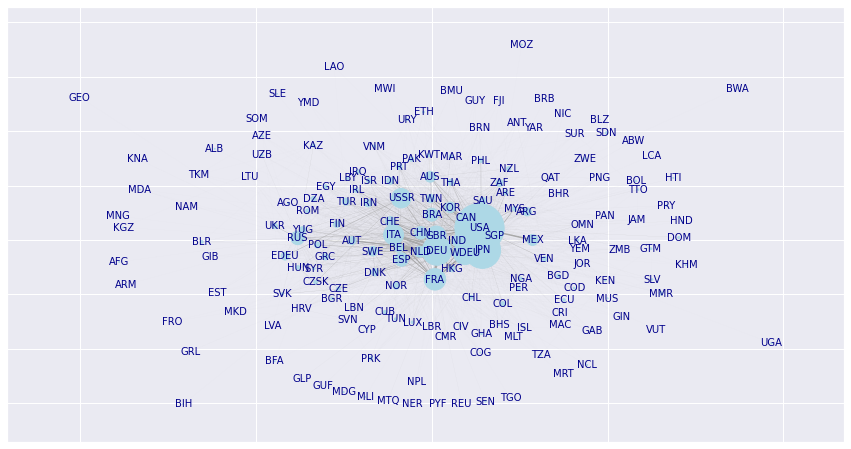

Graph with 180 nodes and 2414 edges  :  1995-2004


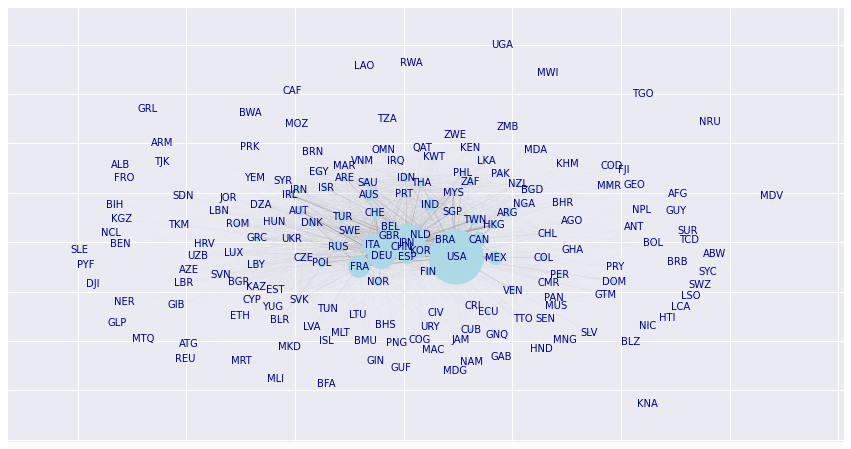

Graph with 189 nodes and 3687 edges  :  2005-2014


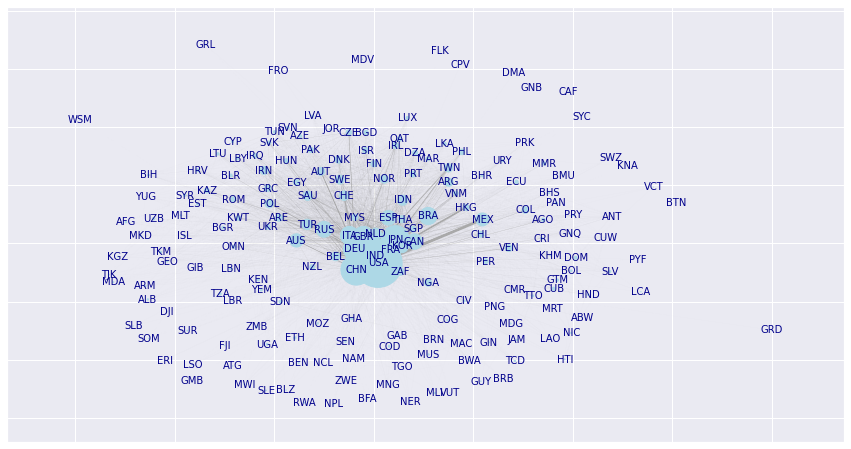

In [261]:
print_graph(gb_trade_tot)

# Shell Layout : différencier G7, G20, les autres

In [262]:


def print_graph(df):
    
    
    for dec in decennies:       

        fig, ax = plt.subplots(figsize=(15,8))

        l = []
        for i in gb_trade_tot[gb_trade_tot.decennie == dec].values.tolist():
            l.append(tuple((i[1], i[2], {'mean_total': int(i[4])})))

        G=nx.Graph()
        G.add_edges_from(l)
        print(nx.info(G), ' : ', dec)

        ### Edges weight
        edges_weight = [i[2]['mean_total'] for i in list(G.edges.data())]
        sum_ew = sum(edges_weight)
        ew_normalized = [e/sum_ew*100 for e in edges_weight ]


        ### Nodes size
        df_dec = gb_pop_bip[gb_pop_bip.decennie == dec].sort_values('mean_gdb', ascending=False).reset_index()
        df_dec['gdp_rank'] = df_dec.apply(lambda x : 1 if x.name < 7 else (2 if x.name < 20 else 3 ), axis = 1)
        l_gdp_rank = dict([(l[2], {'mean_gdb': l[3], 'gdp_rank':l[5]}) for l in df_dec.values])
        nx.set_node_attributes(G, l_gdp_rank)

        tot_gdp = df_dec.mean_gdb.sum()
        min_gdp = df_dec.mean_gdb.min()

        nodes_size = [] 
        for i in list(G.nodes.data()):
            try:
                nodes_size.append(i[1]['mean_gdb']/tot_gdp*10000) 
            except:
                nodes_size.append(min_gdp/tot_gdp*10000)


        ## Ajouter les ranks qui manquent
        for node in G.nodes:
           node_dict = G.nodes[node]
           if node_dict.get('gdp_rank') is None:
              node_dict['gdp_rank']= 3


        r_1 = [] 
        r_2 = [] 
        r_3 = [] 
        for i in list(G.nodes.data()):
            try:
                if i[1]['gdp_rank'] == 1:
                    r_1.append(i[0])
                elif i[1]['gdp_rank'] == 2:
                    r_2.append(i[0])
                else:
                    r_3.append(i[0])
            except:
                r_3.append(i[1])
        ranks = [r_1, r_2, r_3]

        liste_couleurs = [] 
        for i in list(G.nodes.data()):
            try:
                if i[1]['gdp_rank'] == 1:
                    liste_couleurs.append('#e5989b')
                elif i[1]['gdp_rank'] == 2:
                    liste_couleurs.append('#fcbf49')
                else:
                    liste_couleurs.append('#a8dadc')
            except:
                liste_couleurs.append('#a8dadc')

        
        pos = nx.shell_layout(G, ranks, rotate = 2) # , scale=2

        nx.draw_networkx(G, pos, width=ew_normalized, node_size=nodes_size,\
                 node_color=liste_couleurs, font_size=10, font_color='darkblue', edge_color='darkgrey')

        plt.show()

Graph with 45 nodes and 71 edges  :  1945-1954


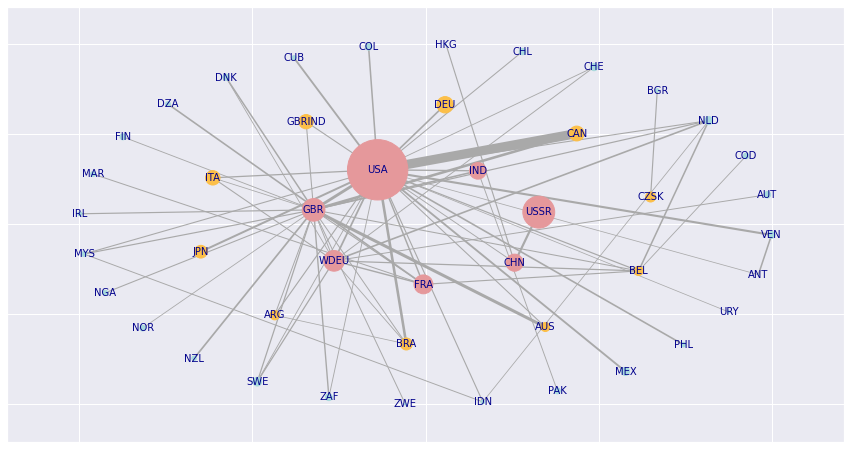

Graph with 58 nodes and 128 edges  :  1955-1964


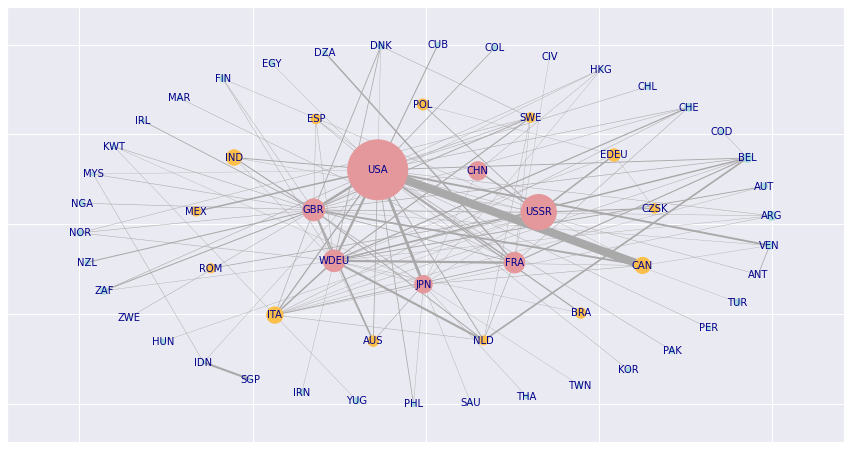

Graph with 98 nodes and 473 edges  :  1965-1974


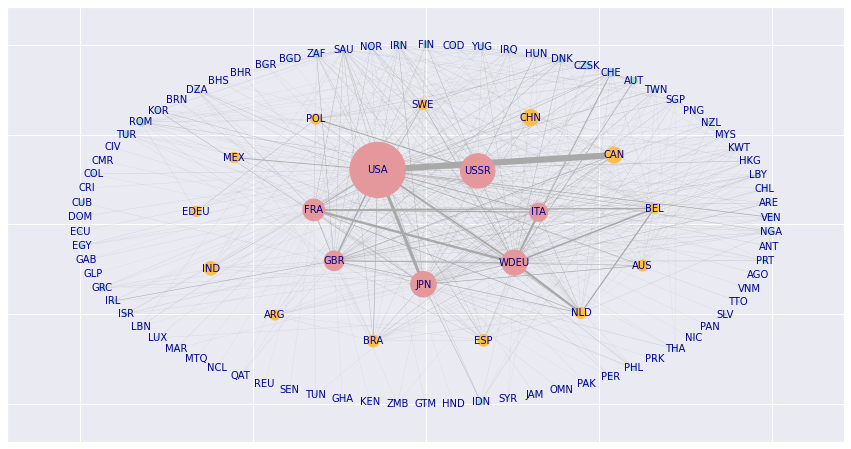

Graph with 137 nodes and 1240 edges  :  1975-1984


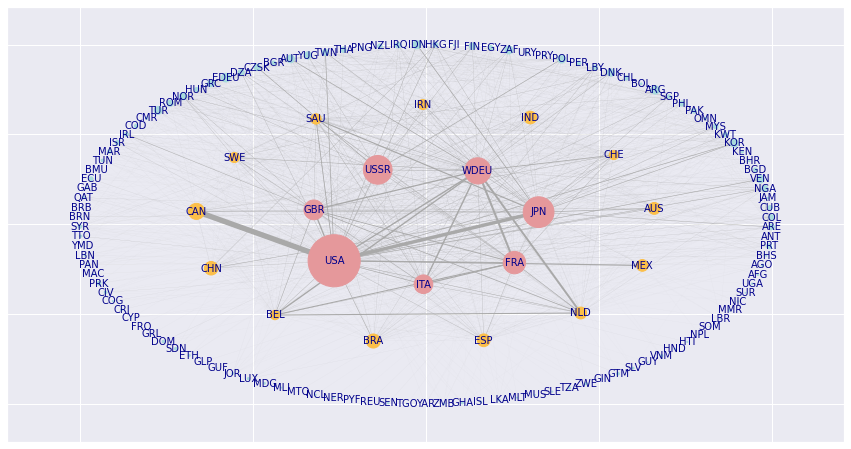

Graph with 175 nodes and 1959 edges  :  1985-1994


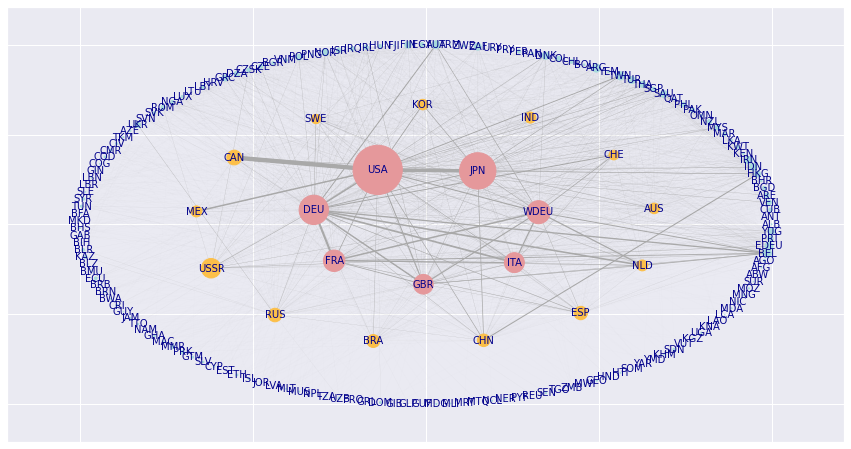

Graph with 180 nodes and 2414 edges  :  1995-2004


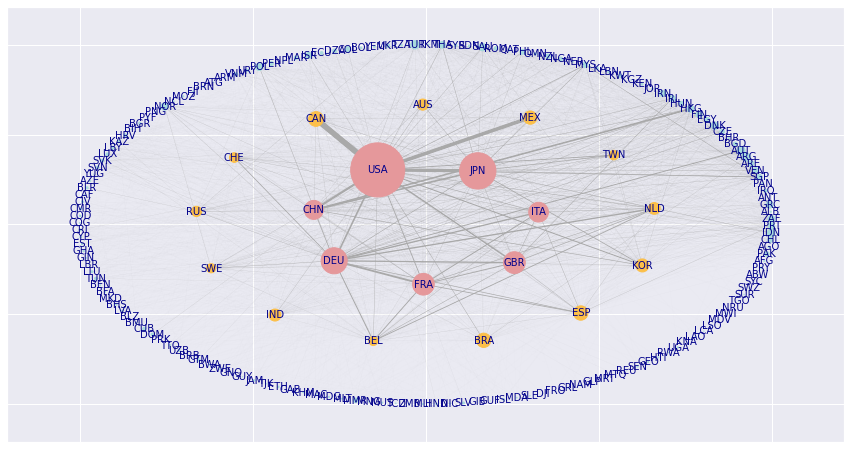

Graph with 189 nodes and 3687 edges  :  2005-2014


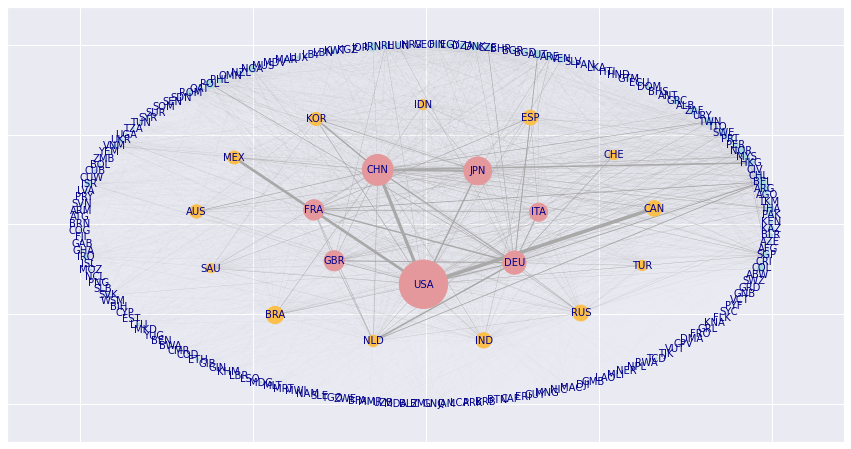

In [263]:
print_graph(gb_trade_tot)

# Représentation géographique

In [ ]:
l_pays = dict([(l[0], {'name': l[1], 'continent':l[2], 'region': l[3], 'long': l[4], 'lat':l[5]}) for l in liste_pays.values])
list((k,v) for k,v in l_pays.items())[:3]

In [ ]:
nx.set_node_attributes(G, l_pays)
print(list(G.nodes.data())[:3])

In [95]:
pos = {i[0]:(i[1]['long'], float(i[1]['lat'])) for i in list(G.nodes.data())}
list(pos.items())[:5]

[('ANT', (-68.75, 12.25)),
 ('USA', (-97.0, 38.0)),
 ('VEN', (-66.0, 8.0)),
 ('ARG', (-64.0, -34.0)),
 ('BRA', (-55.0, -10.0))]

In [ ]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
plt.title("Mercator Projection")
plt.show()

## Nouvelle fonction

In [278]:
def print_graph(df):
    
    
    for dec in decennies:       

        fig, ax = plt.subplots(figsize=(20,10))
        
        m = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=75,llcrnrlon=-180,urcrnrlon=180,resolution='c')
        m.drawcoastlines()
        


        l = []
        for i in gb_trade_tot[gb_trade_tot.decennie == dec].values.tolist():
            l.append(tuple((i[1], i[2], {'mean_total': int(i[4])})))

        G=nx.Graph()
        G.add_edges_from(l)
        print(nx.info(G), ' : ', dec)

        ### Edges weight
        edges_weight = [i[2]['mean_total'] for i in list(G.edges.data())]
        sum_ew = sum(edges_weight)
        ew_normalized = [e/sum_ew*100 for e in edges_weight ]


        ### Nodes size
        df_dec = gb_pop_bip[gb_pop_bip.decennie == dec].sort_values('mean_gdb', ascending=False).reset_index()
        df_dec['gdp_rank'] = df_dec.apply(lambda x : 1 if x.name < 7 else (2 if x.name < 20 else 3 ), axis = 1)
        l_gdp_rank = dict([(l[2], {'mean_gdb': l[3], 'gdp_rank':l[5]}) for l in df_dec.values])
        nx.set_node_attributes(G, l_gdp_rank)

        tot_gdp = df_dec.mean_gdb.sum()
        min_gdp = df_dec.mean_gdb.min()

        nodes_size = [] 
        for i in list(G.nodes.data()):
            try:
                nodes_size.append(i[1]['mean_gdb']/tot_gdp*10000) 
            except:
                nodes_size.append(min_gdp/tot_gdp*10000)


        ### Position des sommets par long, lat
        #  https://stackoverflow.com/questions/32488772/drawing-nodes-with-coordinates-in-correct-position-using-networkx-matplotlib
        l_pays = dict([(l[0], {'name': l[1], 'continent':l[2], 'region': l[3], 'long': l[4], 'lat':l[5]}) for l in liste_pays.values])
        nx.set_node_attributes(G, l_pays)        
        
        ### Noter le 'm' (i.e. la variable de la carte) qui convertit long/lat dans la projection de la carte
        #  https://stackoverflow.com/questions/19915266/drawing-a-graph-with-networkx-on-a-basemap
        ## Cf. https://tuangauss.github.io/projects/networkx_basemap/networkx_basemap.html
        pos = {i[0]:m(i[1]['long'], i[1]['lat']) for i in list(G.nodes.data())}

        
        ## Ajouter les ranks qui manquent
        for node in G.nodes:
           node_dict = G.nodes[node]
           if node_dict.get('gdp_rank') is None:
              node_dict['gdp_rank']= 3


        liste_couleurs = [] 
        for i in list(G.nodes.data()):
            try:
                if i[1]['gdp_rank'] == 1:
                    liste_couleurs.append('#e5989b')
                elif i[1]['gdp_rank'] == 2:
                    liste_couleurs.append('#fcbf49')
                else:
                    liste_couleurs.append('#a8dadc')
            except:
                liste_couleurs.append('#a8dadc')
        

        
        
        nx.draw_networkx(G, pos, width=ew_normalized, node_size=nodes_size,\
                 node_color=liste_couleurs, font_size=10, font_color='darkblue', edge_color='darkgrey')
        
        
        
        plt.show()

Graph with 45 nodes and 71 edges  :  1945-1954


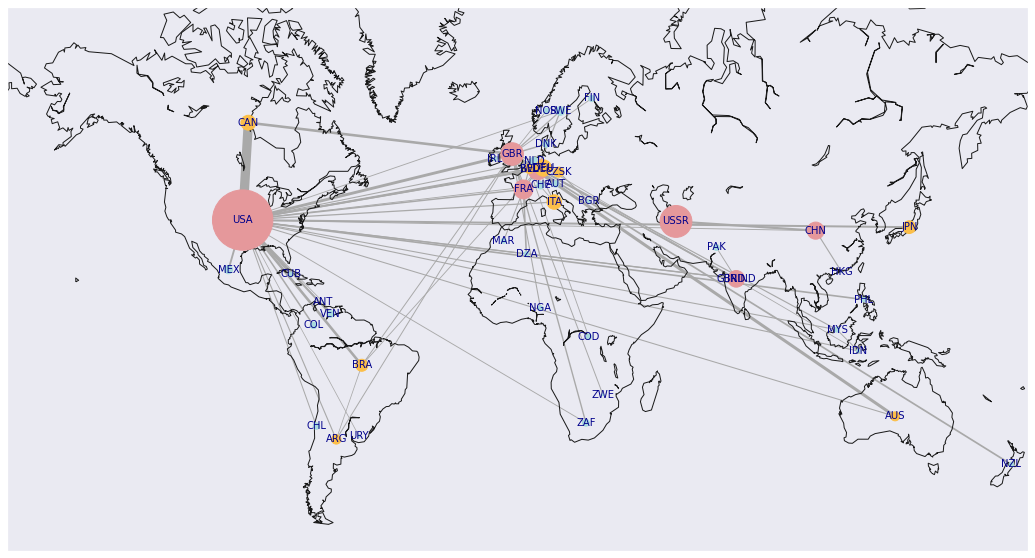

Graph with 58 nodes and 128 edges  :  1955-1964


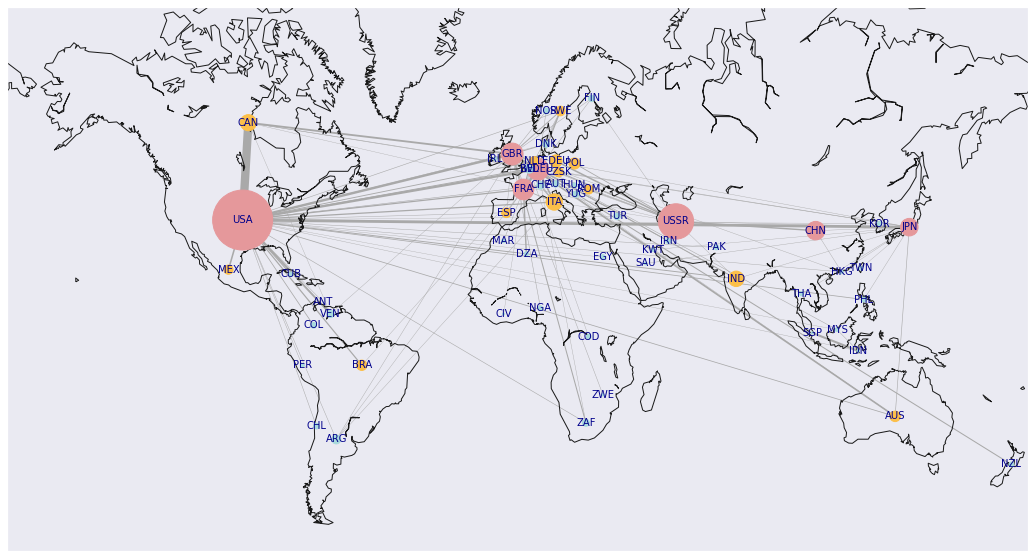

Graph with 98 nodes and 473 edges  :  1965-1974


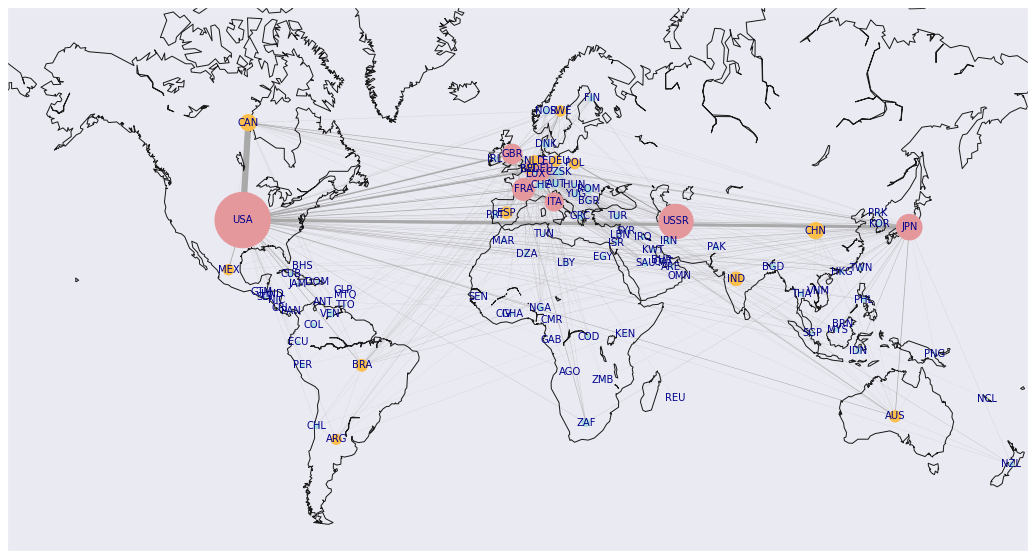

posx and posy should be finite values
posx and posy should be finite values


Graph with 137 nodes and 1240 edges  :  1975-1984


posx and posy should be finite values
posx and posy should be finite values


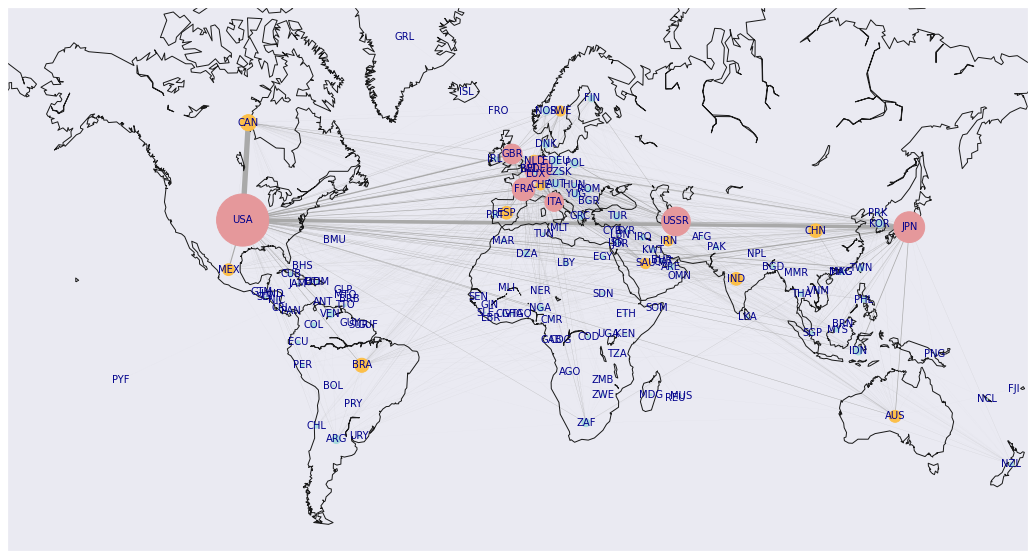

posx and posy should be finite values
posx and posy should be finite values


Graph with 175 nodes and 1959 edges  :  1985-1994


posx and posy should be finite values
posx and posy should be finite values


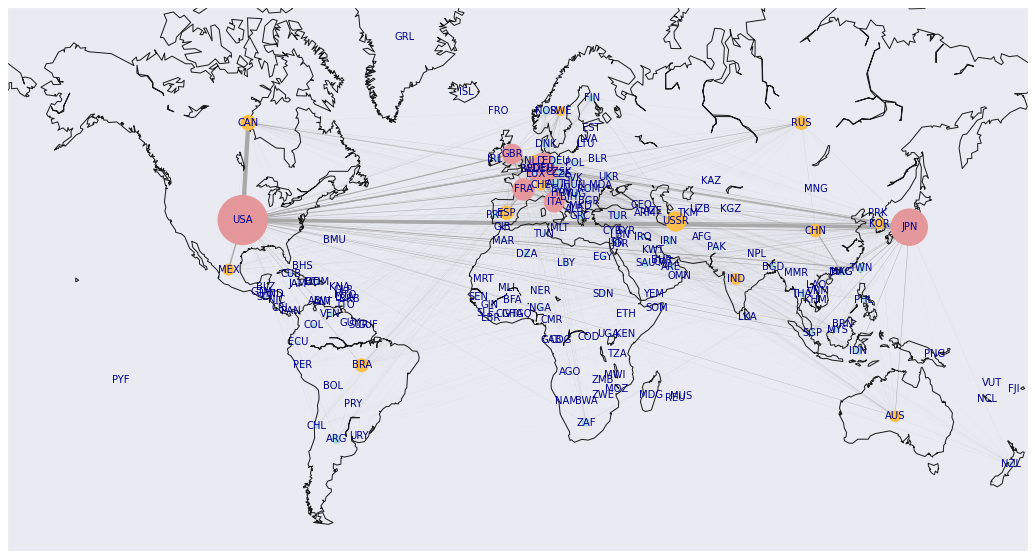

Graph with 180 nodes and 2414 edges  :  1995-2004


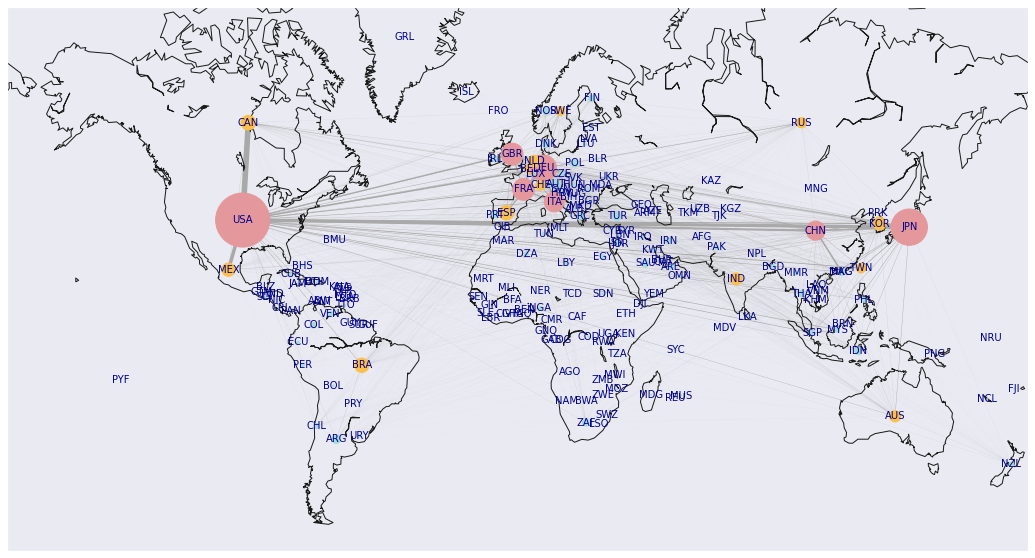

Graph with 189 nodes and 3687 edges  :  2005-2014


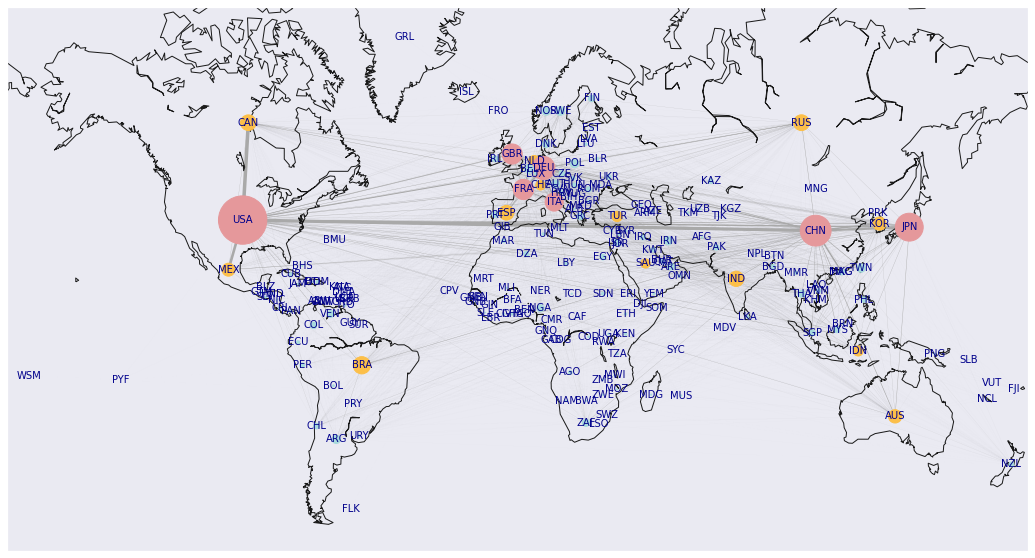

In [279]:
print_graph(gb_trade_tot)

# Correlation de propriétés structurales et valeurs GDP

In [282]:
def print_graph(df):
    
    x = 0
            
    for dec in decennies:       

        ###  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        
        y = 0
        
        
        
        l = []
        for i in gb_trade_tot[gb_trade_tot.decennie == dec].values.tolist():
            l.append(tuple((i[1], i[2], {'mean_total': int(i[4])})))

        G=nx.Graph()
        G.add_edges_from(l)
        # print(nx.info(G), ' : ', dec)
        
        ### Edges weight
        edges_weight = [i[2]['mean_total'] for i in list(G.edges.data())]
        sum_ew = sum(edges_weight)
        ew_normalized = [e/sum_ew*100 for e in edges_weight ]
        
        ### Nodes size
        df_dec = gb_pop_bip[gb_pop_bip.decennie == dec].sort_values('mean_gdb', ascending=False).reset_index()
        df_dec['gdp_rank'] = df_dec.apply(lambda x : 1 if x.name < 7 else (2 if x.name < 20 else 3 ), axis = 1)
        ### Noter l'ajout de la fonction logarithmique en base 10
        # https://numpy.org/doc/stable/reference/generated/numpy.log10.html#numpy.log10
        l_gdp_rank = dict([(l[2], {'mean_gdb': np.log10(l[3]), 'gdp_rank':l[5]}) for l in df_dec.values])
        nx.set_node_attributes(G, l_gdp_rank)

        tot_gdp = df_dec.mean_gdb.sum()
        min_gdp = df_dec.mean_gdb.min()
        
        degree = dict([(d[0], {'degree': d[1]}) for d in nx.degree(G)])
        nx.set_node_attributes(G, degree)
        
        eigenvector = nx.eigenvector_centrality(G)
        nx.set_node_attributes(G, eigenvector, 'eigenvector')

        
        export = pd.DataFrame(G.nodes.data(), columns = ['id', 'attributes'])
        export = export.join(pd.json_normalize(export.attributes)).set_index('id')
        export.drop(columns=['attributes'], inplace=True)
        
        #print(export.head())
        
        
        degree = export.degree
        eigenvector = export.eigenvector
        mean_gdb = export.mean_gdb
        
        print('Periode: {prd}'.format(prd = dec))
        
        
        ## Ajouter les ranks qui manquent
        for node in G.nodes:
           node_dict = G.nodes[node]
           if node_dict.get('gdp_rank') is None:
              node_dict['gdp_rank']= 3


        liste_couleurs = [] 
        for i in list(G.nodes.data()):
            try:
                if i[1]['gdp_rank'] == 1:
                    liste_couleurs.append('#d00000')
                elif i[1]['gdp_rank'] == 2:
                    liste_couleurs.append('#fcbf49')
                else:
                    liste_couleurs.append('#a8dadc')
            except:
                liste_couleurs.append('#a8dadc')
        

        
        #print('Coeff. de Pearsons: {}'.format(np.corrcoef(degree, mean_gdb)[1][0].round(4)))
        corr_spear = export[['degree','mean_gdb']].corr(method="spearman")
        # corr_spear
        print('Coeff. de Spearman pour degree: {}'.format(corr_spear.iloc[0,1]))

        ax1.scatter(degree, mean_gdb, c = liste_couleurs)
        for i,row in list(export[['degree','mean_gdb']].iterrows()):
           ax1.annotate(i,(row['degree'], row['mean_gdb']))
        ax1.set_xlabel ('Centralité de degré')
        ax1.set_ylabel ('Log10 de la moyenne du PIP')


        corr_spear = export[['eigenvector','mean_gdb']].corr(method="spearman")
        # corr_spear
        print('Coeff. de Spearman pour eigenvector: {}'.format(corr_spear.iloc[0,1]))

        ax2.scatter(eigenvector, mean_gdb, c = liste_couleurs)
        for i,row in list(export[['eigenvector','mean_gdb']].iterrows()):
            ax2.annotate(i,(row['eigenvector'], row['mean_gdb']))
        ax2.set_xlabel('Centralité de eigenvector (influence)')
        ax2.set_ylabel("Log10 de la moyenne du PIP")
        
        

        #fig.tight_layout()
                        
        plt.show()

Periode: 1945-1954
Coeff. de Spearman pour degree: 0.5878909082082945
Coeff. de Spearman pour eigenvector: 0.5560852866768402


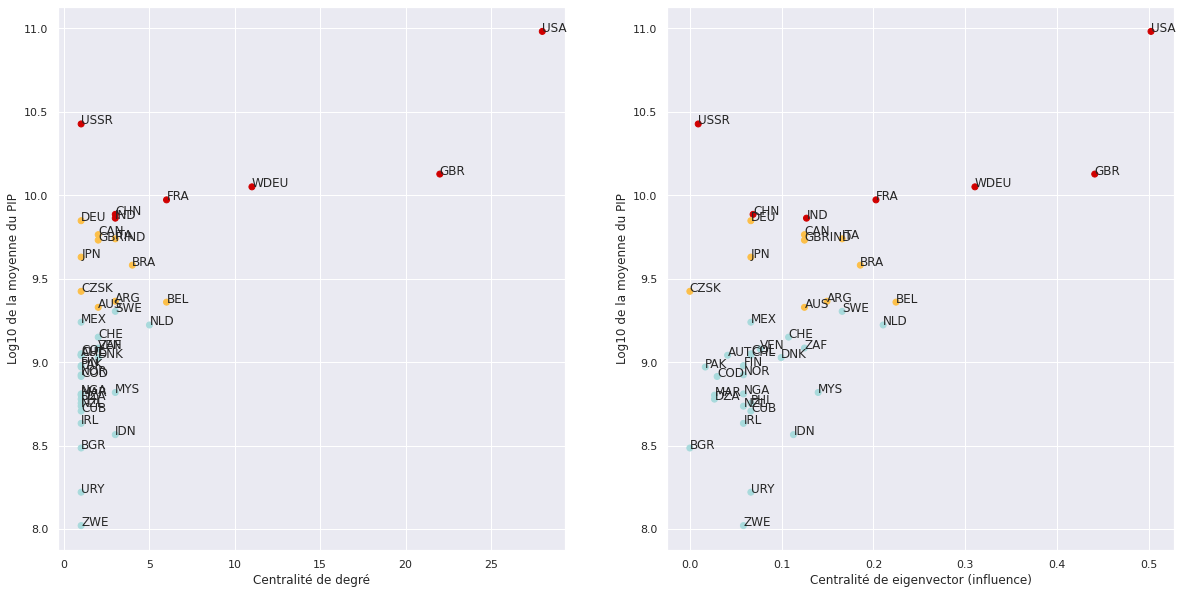

Periode: 1955-1964
Coeff. de Spearman pour degree: 0.7092804523630579
Coeff. de Spearman pour eigenvector: 0.639188295579514


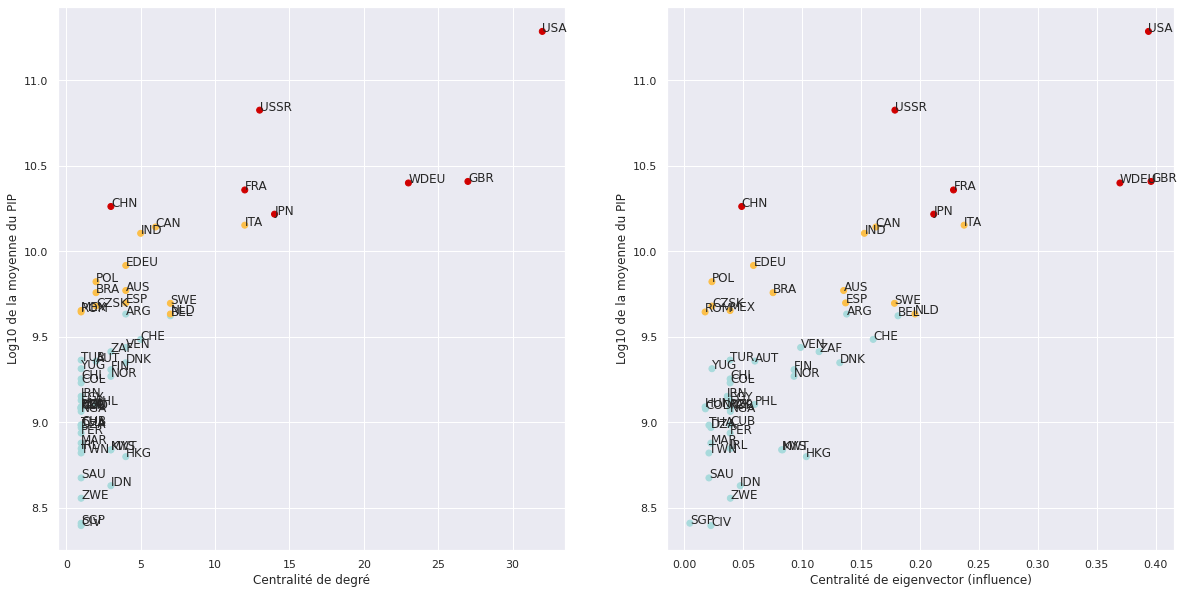

Periode: 1965-1974
Coeff. de Spearman pour degree: 0.8292466335587819
Coeff. de Spearman pour eigenvector: 0.8257455607765932


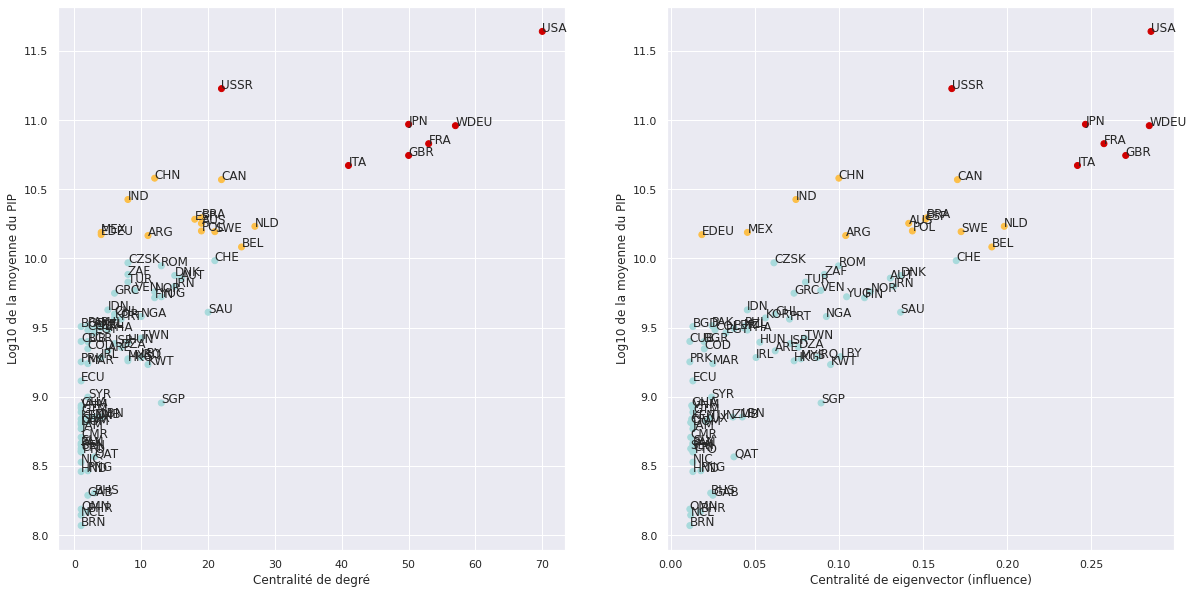

Periode: 1975-1984
Coeff. de Spearman pour degree: 0.9228703423955119
Coeff. de Spearman pour eigenvector: 0.918210205092171


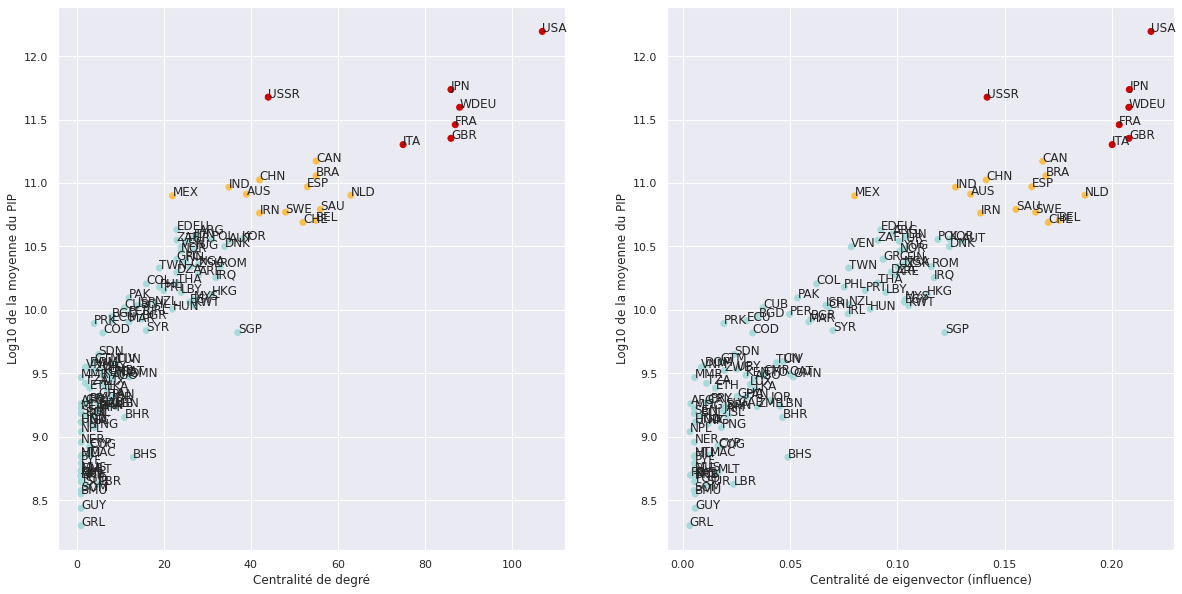

Periode: 1985-1994
Coeff. de Spearman pour degree: 0.9221340636080084
Coeff. de Spearman pour eigenvector: 0.911484645863923


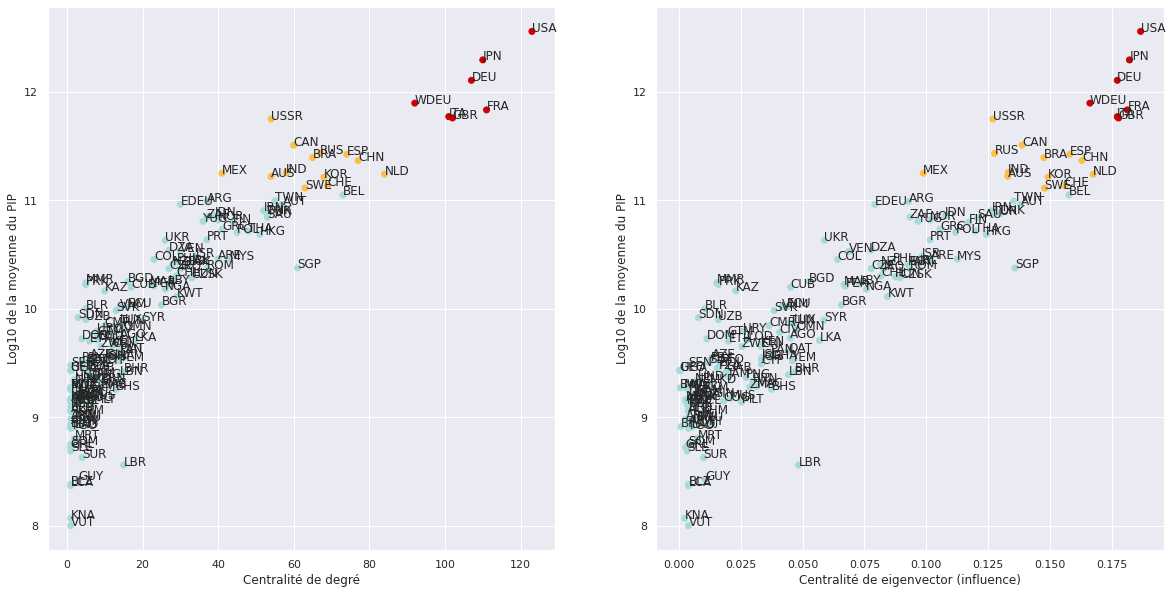

Periode: 1995-2004
Coeff. de Spearman pour degree: 0.9450762653811919
Coeff. de Spearman pour eigenvector: 0.9386354024672039


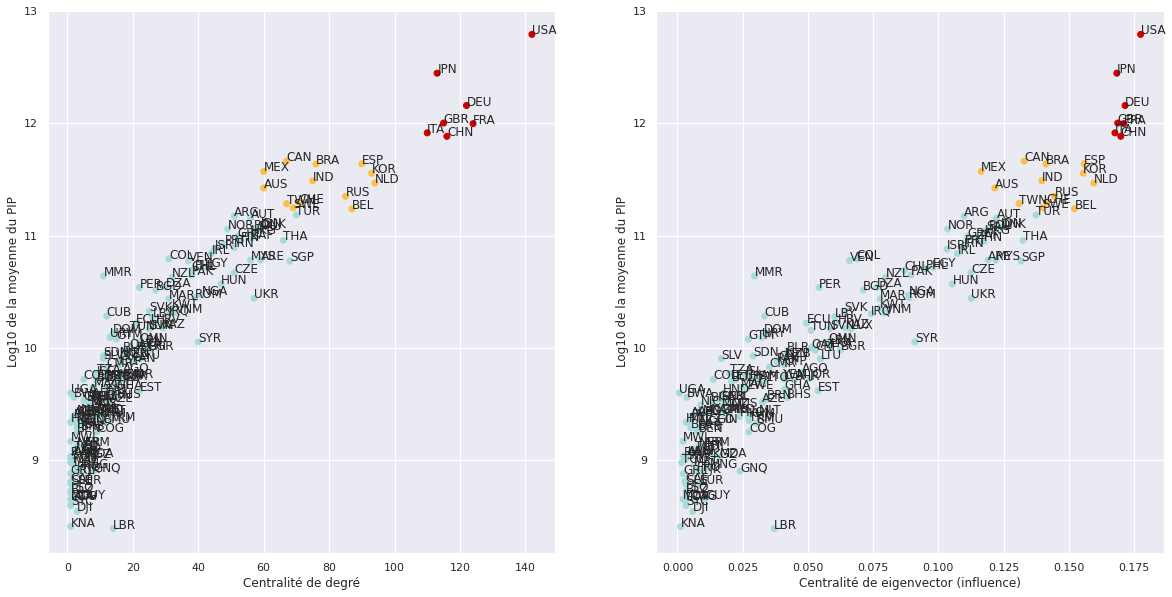

Periode: 2005-2014
Coeff. de Spearman pour degree: 0.9552571263446107
Coeff. de Spearman pour eigenvector: 0.954323231904293


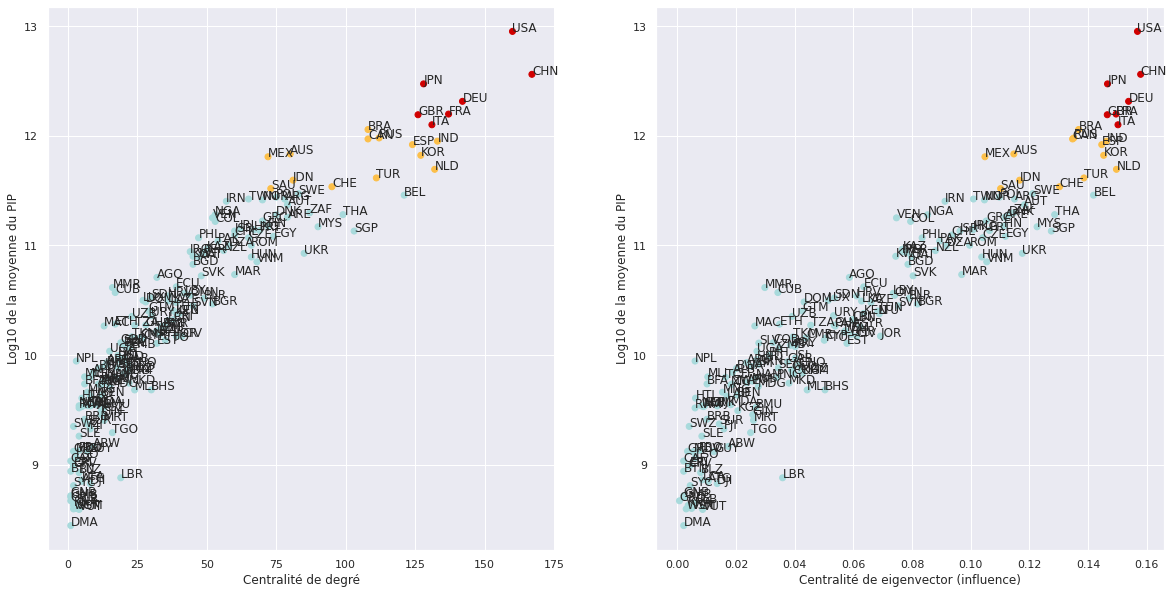

In [283]:
print_graph(gb_trade_tot)